## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a **customer’s marital status and number of children** has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

Description of the data
* children: the number of children in the family
* days_employed: how long the customer has been working
* dob_years: the customer’s age
* education: the customer’s education level
* education_id: identifier for the customer’s education
* family_status: the customer’s marital status
* family_status_id: identifier for the customer’s marital status
* gender: the customer’s gender
* income_type: the customer’s income type
* debt: whether the customer has ever defaulted on a loan
* total_income: monthly income
* purpose: reason for taking out a loan


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Step 1. Open the data file and have a look at the general information. 

In [2]:
df = pd.read_csv('data.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
original_size = len(df)
original_size

21525

Notes (Quick Glance)
* expected data types
* two columns with nulls: total income and days employed

In [5]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

**CHILDREN**

* If number of children used, what does -1 mean? Lost a child?
* We should reasonably assume 20 children is not realistic and most likely in error, especially considering the big gap from 5

In [6]:
df['days_employed'].value_counts()

-438.291850       1
-162.794078       1
-327.399826       1
-926.370096       1
-3076.640827      1
                 ..
-9148.749198      1
 335188.686800    1
-1777.966556      1
 366436.538600    1
-259.798468       1
Name: days_employed, Length: 19351, dtype: int64

In [7]:
df['days_employed'].min()

-18388.9499

In [8]:
df['days_employed'].max()

401755.4005

In [9]:
df['days_employed'].median()

-1203.3695289999998

In [10]:
#How many nulls in days_employed?
len(df[df['days_employed'].isnull()])

2174

In [11]:
# % of nulls days_employed
len(df[df['days_employed'].isnull()]) / len(df)

0.10099883855981417

**DAYS EMPLOYED**

* What is the format here?
* 10% null

In [12]:
df['dob_years'].value_counts().head()

35    617
40    609
41    607
34    603
38    598
Name: dob_years, dtype: int64

In [13]:
df['dob_years'].min()

0

**DOB_YEARS**

* is this age? rename column
* consider classification
* age of 0

In [14]:
df['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

**EDUCATION**

* Many dupes due to casing. fortunately, name characters!

In [15]:
df['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

**EDUCATION_ID**

* 5 ids match 5 education types.
* Are they a match? eg - are all 1s the same?

In [16]:
df['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [17]:
df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

**FAMILY STATUS**

* Count match between family status and id

In [18]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

**GENDER**

* only 1 XNA - not material. 
* Is XNA this the same as Null? does it have a particular connotation?

In [19]:
df['income_type'].value_counts()

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [20]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

**DEBT**

*rename column to defaulted as 1 equal yes

In [21]:
df['total_income'].value_counts()

31791.384    2
42413.096    2
17312.717    2
20226.282    1
26935.722    1
            ..
23463.319    1
8015.655     1
25198.165    1
13809.189    1
9591.824     1
Name: total_income, Length: 19348, dtype: int64

In [22]:
df['total_income'].min()

3306.762

In [23]:
df['total_income'].max()

362496.645

In [24]:
#How many nulls in total income?
len(df[df['total_income'].isnull()])

2174

In [25]:
# % of nulls total income
len(df[df['total_income'].isnull()]) / len(df)

0.10099883855981417

**TOTAL INCOME**
* What unit? Are these expected numbers?
* 10% NULLS

In [26]:
df['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
purchase of my own house                    620
building a property                         620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

**PURPOSE**
* a lot of dupes here. Possible to better classify but not easy pattern 
* 4 buckets: wedding, education/university/educated, car/cars, property/house/real estate/housing
* all lower case

In [27]:
#column renamings
df.rename(columns={"debt": "defaulted", "dob_years": "age", "purpose": "loan_purpose"}, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
age                 21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
defaulted           21525 non-null int64
total_income        19351 non-null float64
loan_purpose        21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**BENCHMARK DEFAULT RATE**

In [29]:
len(df.loc[df['defaulted']==1]) / len(df)

0.08088269454123112

The overall loan default rate is 8%

### Conclusion

For the sake of understand marital status and number of children against the chance a person will default: 
* Marital status is straight forward but number of children has a strange value of -1. Does that mean customers doesn't want or can't have children? 
* There is no way to check if there are duplicate rows vs there being multiple customers that share the same characteristics so I'll assume each row should be counted as a customer

### Step 2. Data preprocessing

### Processing missing values

In [30]:
# TOTAL INCOME
# Let's understand if there is an explanation for total income
null_income = df.loc[df['total_income'].isna()]
len(null_income)

2174

In [31]:
null_income['age'].median()

43.0

In [32]:
#assumption that perhaps children were the ones with 0 income was wrong
# let's check if there is a connection with employment

In [33]:
null_income['days_employed'].value_counts()

Series([], Name: days_employed, dtype: int64)

In [34]:
#it seems all of the customers without total income have days employed empty too. 
# Is there an exact match between days employes and total income? 
len(null_income) == len(df.loc[df['days_employed'].isna()])

True

In [35]:
# This means the reason why total income is null is because the person has not worked and/or we dont have employment info

In [36]:
null_income['education'].value_counts()

secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
Some College              7
SOME COLLEGE              7
PRIMARY EDUCATION         1
Primary Education         1
Name: education, dtype: int64

In [37]:
# the education level spans. there is no correlation

In [38]:
null_income['children'].value_counts()

 0     1439
 1      475
 2      204
 3       36
 20       9
 4        7
-1        3
 5        1
Name: children, dtype: int64

no correlation with total imcome being empty and age.

In [39]:
null_income['family_status'].value_counts()

married              1237
civil partnership     442
unmarried             288
divorced              112
widow / widower        95
Name: family_status, dtype: int64

customers with missing values for income have a variety of marital status. No correlation

In [40]:
null_income['defaulted'].value_counts()

0    2004
1     170
Name: defaulted, dtype: int64

In [41]:
170/(2004+170)

0.078196872125115

this is the most surprising part. I expected if total income == nan meant 0 income we should have all defaults but as over 90% have not defaulted, perhaps we just don't have income information. As there isn't indication that having this field null correlates with a particular value in another column, we will go ahead and drop nulls.

In [42]:
df.isnull().sum()

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
defaulted              0
total_income        2174
loan_purpose           0
dtype: int64

In [43]:
df = df.dropna().reset_index(drop=True)

In [44]:
# Are nulls removed?
df.isnull().sum()

children            0
days_employed       0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
defaulted           0
total_income        0
loan_purpose        0
dtype: int64

In [45]:
# CHILDREN 20
# As 20 children is realistic, we should assume this is wrong and this data is missing. 

children_20 = df.loc[df['children']==20]

In [46]:
len(children_20)

67

In [47]:
# is there a way to know if there are more likely 0? Perhaps are they all from really young ages or certain marital status?
children_20['family_status'].value_counts()

married              46
civil partnership    11
unmarried             6
widow / widower       3
divorced              1
Name: family_status, dtype: int64

In [48]:
children_20['age'].value_counts().head()

37    4
40    4
56    4
30    3
34    3
Name: age, dtype: int64

In [49]:
children_20['defaulted'].value_counts()

0    59
1     8
Name: defaulted, dtype: int64

In [50]:
#children_20 default rate
8/68

0.11764705882352941

In [51]:
# What % data has children_20?
len(children_20) / len(df)

0.0034623533667510723

In [52]:
# What % of data has children -1?
len(df.loc[df['children']==-1])/len(df)

0.002273784300552943

In [53]:
#Total unknown children
(len(df.loc[df['children']==-1])+len(children_20))/len(df)

0.0057361376673040155

In [54]:
df.loc[df['children']==-1]['defaulted'].value_counts()

0    43
1     1
Name: defaulted, dtype: int64

In [55]:
#number of defaults per number of children
groupby = df.groupby('children')['defaulted'].sum()
groupby

children
-1       1
 0     952
 1     408
 2     177
 3      22
 4       3
 5       0
 20      8
Name: defaulted, dtype: int64

In [56]:
#default rate by # children
groupby/len(df)

children
-1     0.000052
 0     0.049196
 1     0.021084
 2     0.009147
 3     0.001137
 4     0.000155
 5     0.000000
 20    0.000413
Name: defaulted, dtype: float64

Assumingly, this should have been 2 or 0 instead of 20. I checked some properties that may correlate with 0 children (age, education) and there was no correlation that lead me to believe it is 0. Finally, checking default rate across number of children. The default rate pattern for 20 doesn't match 0 at all and it is closer but not exactcly matching 2 so I will be just dropping it. 

Although I believe -1 most likely really means something as adding a negative sign is lot a likely error, I will be dropping it too as we were not informed what it meant 

In [57]:
df = df.loc[df['children'] != -1]
df = df.loc[df['children'] != 20]

In [58]:
df['children'].value_counts()

0    12710
1     4343
2     1851
3      294
4       34
5        8
Name: children, dtype: int64

In [59]:
#GENDEX XNA
df['gender'].value_counts()

F      12677
M       6562
XNA        1
Name: gender, dtype: int64

In [60]:
df = df.loc[df['gender'] != 'XNA']

In [61]:
df['gender'].value_counts()

F    12677
M     6562
Name: gender, dtype: int64

In [62]:
#AGE
# dropping records with age 0
df['age'].value_counts()

35    553
41    544
38    541
40    537
34    528
42    528
33    526
39    522
44    499
29    493
31    491
48    490
36    490
37    478
30    478
32    469
43    460
50    459
49    455
27    454
28    444
45    444
52    430
56    429
54    421
46    421
47    421
53    414
59    408
58    405
57    402
51    396
55    393
26    371
60    338
25    334
61    315
62    313
24    241
63    239
64    226
23    216
65    174
22    166
66    163
67    151
21     92
68     90
0      90
69     78
70     62
71     53
20     46
72     31
19     13
73      7
74      6
75      1
Name: age, dtype: int64

In [63]:
df = df.loc[df['age'] != 0]

In [64]:
#new number of records
len(df)

19149

In [65]:
#How much of the data was dropped?
1-(len(df)/original_size)

0.11038327526132408

### Conclusion

I'm unsure the reason why **total income** and **days employed** are null but it was important to ntice a customer either has both or is missing both. As the majority did not default, I assume that rather than these customers not having income we just don't have employment information. I tried to identify another column that would indicate when this happens without luck. Although we could keep them as NaN and still do math on the column and although I could replace total income with the median, we wouldn't be able to keep days_employed and still do the data type replacement asked later in this project. For this reason only, they were dropped and hence we lost 8% of the records.

As 20 **children** is unrealistic, -1 is impossible, and number of children is a variable of interest: I have dropped these.

There was a **gender** called 'XNA' as it includes NA I'm leaning to assume that it wasn't available but there is potential the customer either didnt want to fill this or perhaps this is a categorization for non-binary. As we don't know the reason and it is only 1 record, it was dropped

In the **age** column there was a value of 0 which is clearly impossible. This was dropped.

At the end, we dropped 11% of the original dataset.

### Data type replacement

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19149 entries, 0 to 19350
Data columns (total 12 columns):
children            19149 non-null int64
days_employed       19149 non-null float64
age                 19149 non-null int64
education           19149 non-null object
education_id        19149 non-null int64
family_status       19149 non-null object
family_status_id    19149 non-null int64
gender              19149 non-null object
income_type         19149 non-null object
defaulted           19149 non-null int64
total_income        19149 non-null float64
loan_purpose        19149 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.9+ MB


In [67]:
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,defaulted,total_income,loan_purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072000,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [68]:
#Only two columns can be changed type to integers below.
df['days_employed'] = df['days_employed'].astype(int)
df['total_income'] = df['total_income'].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19149 entries, 0 to 19350
Data columns (total 12 columns):
children            19149 non-null int64
days_employed       19149 non-null int32
age                 19149 non-null int64
education           19149 non-null object
education_id        19149 non-null int64
family_status       19149 non-null object
family_status_id    19149 non-null int64
gender              19149 non-null object
income_type         19149 non-null object
defaulted           19149 non-null int64
total_income        19149 non-null int32
loan_purpose        19149 non-null object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


### Conclusion

We have changed the data types of the days_employed and total_income from float to integers. The remaining data types are correct. Surprisingly... despite the change from float to int, the dataset still uses the same memory.

**Recommendation** - Clearly, there is something wrong with the days_employed column. There are negative numbers but these are not just outliers; they represent the majority of the column. Why is this happening?

### Processing duplicates

As noticed during first exploring the data, the field **education** has dupes that are only the results of different cases. This is an easy fix

In [70]:
df['education'].value_counts()

secondary education    12216
bachelor's degree       4175
SECONDARY EDUCATION      697
Secondary Education      636
some college             607
BACHELOR'S DEGREE        247
Bachelor's Degree        242
primary education        231
Some College              40
SOME COLLEGE              22
PRIMARY EDUCATION         16
Primary Education         14
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [71]:
df['education'] = df['education'].str.lower()

In [72]:
df['education'].value_counts()

secondary education    13549
bachelor's degree       4664
some college             669
primary education        261
graduate degree            6
Name: education, dtype: int64

As noticed during first exploring the data, the field **purpose** has a lot of dupes that do not follow a strict pattern. I have been able to identify key words that will enable us to rephrase these in an easier way to follow.

In [73]:
df['loan_purpose'].value_counts()

wedding ceremony                            716
to have a wedding                           684
having a wedding                            677
real estate transactions                    609
buy commercial real estate                  592
buying property for renting out             584
purchase of the house                       584
housing                                     579
transactions with commercial real estate    575
building a real estate                      573
purchase of my own house                    572
housing transactions                        569
purchase of the house for my family         568
property                                    568
building a property                         561
transactions with my real estate            555
construction of own property                551
buy real estate                             545
buy residential real estate                 541
housing renovation                          538
buying my own car                       

In [74]:
def purpose_category(purpose):
    if 'wedding' in purpose:
        return 'wedding'
    elif 'education' in purpose:
        return 'education'
    elif 'university' in purpose:
        return 'education'
    elif 'educated' in purpose:
        return 'education'
    elif 'car' in purpose:
        return 'car'
    elif 'cars' in purpose:
        return 'car'
    elif 'property' in purpose:
        return 'real estate'
    elif 'house' in purpose:
        return 'real estate'
    elif 'real estate' in purpose:
        return 'real estate'
    elif 'housing' in purpose:
        return 'real estate'
    else:
        return 'missing'

In [75]:
df['purpose_category'] = df['loan_purpose'].apply(purpose_category)

In [76]:
df['purpose_category'].value_counts()

real estate    9664
car            3851
education      3557
wedding        2077
Name: purpose_category, dtype: int64

In [77]:
df.loc[df['purpose_category'] =='missing']

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,defaulted,total_income,loan_purpose,purpose_category


Purpose now was made into 4 buckets that we could work with rather than having so many dupes that mean the same thing. This formula won't sustain all future inputs. This is a good time to add data validation so the customer picks from reasons. If this lists exist, we can use it in this function. 

### Conclusion

Education was easily fixed by just having a matching case. We should make it inherent to the database that this column is automaticlally turned lower case.

Regarding purpose, purpose was changed to 4 buckets in a new purpose category column that we can work with moving forward.

### Categorizing Data

The field age is fine but doing analysis on each individual age doesn't make sense. It would be more logical to put the ages in categories.

In [78]:
df['age'].value_counts()

35    553
41    544
38    541
40    537
34    528
42    528
33    526
39    522
44    499
29    493
31    491
36    490
48    490
37    478
30    478
32    469
43    460
50    459
49    455
27    454
45    444
28    444
52    430
56    429
54    421
47    421
46    421
53    414
59    408
58    405
57    402
51    396
55    393
26    371
60    338
25    334
61    315
62    313
24    241
63    239
64    226
23    216
65    174
22    166
66    163
67    151
21     92
68     90
69     78
70     62
71     53
20     46
72     31
19     13
73      7
74      6
75      1
Name: age, dtype: int64

In [79]:
df['age'].min()

19

In [80]:
df['age'].max()

75

In [81]:
df['age'].median()

43.0

Although I considered doing 20s, 30s, etc I didn't feel it was fair to have a 10s category for 19. Hence, these are the age brackets we are going with based on a quick check online

* 18-24 years old
* 25-34 years old
* 35-44 years old
* 45-54 years old
* 55-64 years old
* 65-74 years old
* 75 years or older

In [82]:
def age_group(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <=24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    elif 65 <= age <= 74:
        return "65-74"
    else:
        return "75 or over"
    

In [83]:
df['age_group'] = df['age'].apply(age_group)

In [84]:
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,defaulted,total_income,loan_purpose,purpose_category,age_group
0,1,-8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,real estate,35-44
1,1,-4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase,car,35-44
2,0,-5623,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,real estate,25-34
3,3,-4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,education,25-34
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,wedding,45-54


In [85]:
df['age_group'].value_counts()

35-44         5152
25-34         4588
45-54         4351
55-64         3468
65-74          815
18-24          774
75 or over       1
Name: age_group, dtype: int64

as the last two brackets are so small, let's turn those into 1. 

In [86]:
def age_group(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <=24:
        return "18-24"
    elif 25 <= age <= 34:
        return "25-34"
    elif 35 <= age <= 44:
        return "35-44"
    elif 45 <= age <= 54:
        return "45-54"
    elif 55 <= age <= 64:
        return "55-64"
    else:
        return "65 or over"

In [87]:
df['age_group'] = df['age'].apply(age_group)

In [88]:
df['age_group'].value_counts()

35-44         5152
25-34         4588
45-54         4351
55-64         3468
65 or over     816
18-24          774
Name: age_group, dtype: int64

In [89]:
df['age_group'].value_counts(normalize=True)

35-44         0.269048
25-34         0.239595
45-54         0.227218
55-64         0.181106
65 or over    0.042613
18-24         0.040420
Name: age_group, dtype: float64

In [90]:
# TOTAL INCOME
df['total_income'].min()

3306

In [91]:
df['total_income'].max()

362496

In [92]:
df['total_income'].median()

23202.0

In [93]:
#Is such a low income logical considering the mediann?
df['total_income'].sort_values().head(20)

13154    3306
11727    3392
14565    3418
1444     3471
12876    3503
9826     3595
16659    3815
8203     3913
9088     4036
10866    4049
13863    4212
7481     4245
16099    4386
9591     4444
19049    4465
13451    4494
14938    4592
18171    4650
3658     4664
16799    4672
Name: total_income, dtype: int32

A look at the lowest incomes suggests that it is possible that you get very low incomes. No indication there were a few outliers as I originall expected

It is hard to look at each income individually. We are creating brackets based on 5k increments.
* less than 5000
* 5000-9999
* 10000-14999
* 15000 - 19999
* 20000 or more

In [94]:
def income_group(income):
    if income < 10000:
        return 'Under 10000'
    elif 10000 <= income <15000:
        return "10000 - 14999"
    elif 15000 <= income <20000:
        return "15000 - 19999"
    elif 20000 <= income <25000:
        return "20000 - 24999"
    elif 25000 <= income <30000:
        return "25000 - 29999"
    else:
        return "30000 or more"

In [95]:
df['income_group'] = df['total_income'].apply(income_group)

In [96]:
df.head()

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,defaulted,total_income,loan_purpose,purpose_category,age_group,income_group
0,1,-8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,real estate,35-44,30000 or more
1,1,-4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase,car,35-44,15000 - 19999
2,0,-5623,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,real estate,25-34,20000 - 24999
3,3,-4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,education,25-34,30000 or more
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,wedding,45-54,25000 - 29999


In [97]:
df['income_group'].value_counts()

30000 or more    5859
15000 - 19999    3590
20000 - 24999    3338
10000 - 14999    2790
25000 - 29999    2656
Under 10000       916
Name: income_group, dtype: int64

### Conclusion

The **age** column was changed to age brackets and turned into the age_groupo column. As there was originally a 0 age which was dropped, there should be a way to validate this field. I'm assuming the customer doent want to fill it, needs to put an integer, and chooses 0. The customer shouldn't be able to enter 0 as this is an invalid integer

The **total_income** column was turned into a income group column to be able to do analysis on income brackers instead

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [98]:
df_pivot = df.pivot_table(index='children', values='education_id',columns='defaulted', aggfunc='count')
print(df_pivot.head(10))

defaulted        0      1
children                 
0          11701.0  947.0
1           3923.0  405.0
2           1661.0  177.0
3            271.0   22.0
4             31.0    3.0
5              8.0    NaN


In [99]:
type(df.pivot)

method

In [100]:
children = pd.DataFrame(data=df_pivot)
children.head()

defaulted,0,1
children,,
0,11701.0,947.0
1,3923.0,405.0
2,1661.0,177.0
3,271.0,22.0
4,31.0,3.0


In [101]:
children['default_rate'] = children[1] / (children[0] + children[1])
children['default_rate'] = children['default_rate'] * 100
children

defaulted,0,1,default_rate
children,,,
0,11701.0,947.0,7.487350
1,3923.0,405.0,9.357671
2,1661.0,177.0,9.630033
3,271.0,22.0,7.508532
4,31.0,3.0,8.823529
5,8.0,NaN,NaN


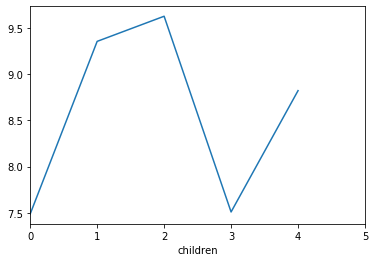

In [102]:
children['default_rate'].plot()

In [103]:
children.loc[5]['default_rate'] = 0

In [104]:
children

defaulted,0,1,default_rate
children,,,
0,11701.0,947.0,7.487350
1,3923.0,405.0,9.357671
2,1661.0,177.0,9.630033
3,271.0,22.0,7.508532
4,31.0,3.0,8.823529
5,8.0,NaN,0.000000


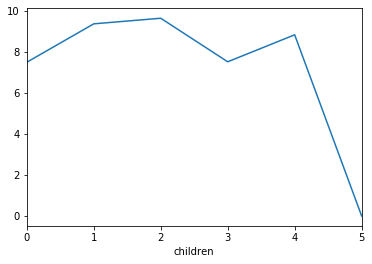

In [105]:
children['default_rate'].plot()

We see that as the number of children increases so does the chance a customer will default but it peaks at 2 children and then it goes down (with a small uptick at 4 children)

In [106]:
# we saw the trend but is there a marked difference between having children or not?
df['children_bool'] = np.where(df['children']==0, 0, 1)

In [107]:
df_pivot = df.pivot_table(index='children_bool', values='education_id',columns='defaulted', aggfunc='count')
children_bool = pd.DataFrame(data=df_pivot)
children_bool['default_rate'] = children_bool[1] / (children_bool[0] + children[1])
children_bool['default_rate'] = children_bool['default_rate'] * 100
children_bool

defaulted,0,1,default_rate
children_bool,,,
0,11701,947,7.48735
1,5894,607,9.63645


we see that customers with no children are less likely to default by 2 percent. Let's take a closer look at these.

In [108]:
df_pivot = df.pivot_table(index=['children_bool','family_status'], values='education_id',columns='defaulted', aggfunc='count')
children_bool = pd.DataFrame(data=df_pivot)
children_bool = children_bool.reset_index()  #to be able to calculate with multiindex
children_bool = children_bool.rename(columns={0: 'count_not_defaulted', 1: 'count_defaulted'})
children_bool['default_rate'] = children_bool['count_defaulted'] / (children_bool['count_defaulted'] + children_bool['count_not_defaulted'])
children_bool['default_rate'] = children_bool['default_rate'] * 100
children_bool

defaulted,children_bool,family_status,count_not_defaulted,count_defaulted,default_rate
0,0,civil partnership,2252,200,8.156607
1,0,divorced,658,49,6.930693
2,0,married,6254,459,6.837480
3,0,unmarried,1830,192,9.495549
4,0,widow / widower,707,47,6.233422
5,1,civil partnership,1114,134,10.737179
6,1,divorced,336,26,7.182320
7,1,married,3934,379,8.787387
8,1,unmarried,418,60,12.552301
9,1,widow / widower,92,8,8.000000


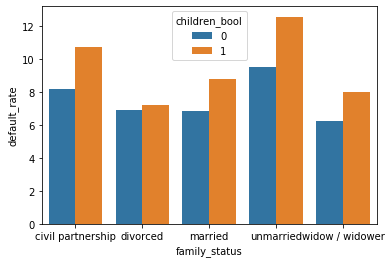

In [109]:
ax = sns.barplot(x="family_status", y="default_rate", hue="children_bool", data=children_bool)

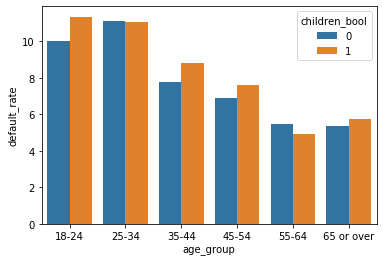

In [110]:
#Let's look at age now.
df_pivot = df.pivot_table(index=['children_bool','age_group'], values='education_id',columns='defaulted', aggfunc='count')
children_bool = pd.DataFrame(data=df_pivot)
children_bool = children_bool.reset_index()  #to be able to calculate with multiindex
children_bool = children_bool.rename(columns={0: 'count_not_defaulted', 1: 'count_defaulted'})
children_bool['default_rate'] = children_bool['count_defaulted'] / (children_bool['count_defaulted'] + children_bool['count_not_defaulted'])
children_bool['default_rate'] = children_bool['default_rate'] * 100
children_bool
ax = sns.barplot(x="age_group", y="default_rate", hue="children_bool", data=children_bool)

### Conclusion

**Yes**, there is a connection with default rates and number of children. As number of children increase so does the default rate with a peak at 2 children but then it goes down (with a small uptick at 4 children) and by the time it reaches 5 you are the least likely to default. 

If we just classify customers as with children or without, we see that customers without children are 2% less likely to default but it seems from our previous observation this is mostly related to the challenges of having your first children.

To dive deeper, we have looked at the chance a customer will default based if they have children AND their marital status. Across the board, you are more likely to default if you have children BUT we now we see a more complete picture. There is  wider difference in default rates for unmarried customers than married or certainly divorced. 

As we looked at age and having children, we see the trend that you are more likely if you have children and that as you age you are less likely to default however there is an interesting pattern in the 55-64 category. 55-64 customers are more likely to default if they dont have children. Perhaps we can deduce that children help elderly parents

- Is there a relation between marital status and repaying a loan on time?

In [111]:
marital = df.pivot_table(index='family_status', values='education_id',columns='defaulted', aggfunc='count')
marital['default_rate'] = marital[1] / (marital[0] + marital[1])
marital['default_rate'] = marital['default_rate'] * 100
marital

defaulted,0,1,default_rate
family_status,,,
civil partnership,3366,334,9.027027
divorced,994,75,7.015903
married,10188,838,7.600218
unmarried,2248,252,10.080000
widow / widower,799,55,6.440281


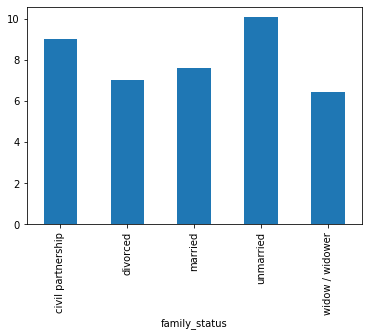

In [112]:
marital['default_rate'].plot(kind='bar')

unmarried customers are much more likely to default in loans, followed by those in civil partnerships

### Conclusion

**yes!** There is a connection between marital status and loan default rate. Unmarried custmers are much more likely to default (50% more than married ones!).

- Is there a relation between income level and repaying a loan on time?

In [113]:
income = df.pivot_table(index='income_group', values='education_id',columns='defaulted', aggfunc='count')
income['default_rate'] = income[1] / (income[0] + income[1])
income['default_rate'] = income['default_rate'] * 100
income

defaulted,0,1,default_rate
income_group,,,
10000 - 14999,2551,239,8.566308
15000 - 19999,3283,307,8.551532
20000 - 24999,3056,282,8.448173
25000 - 29999,2421,235,8.847892
30000 or more,5426,433,7.390340
Under 10000,858,58,6.331878


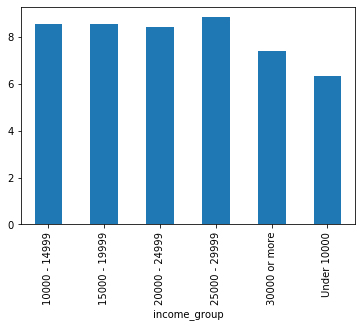

In [114]:
income['default_rate'].plot(kind='bar')

Very surprisingly there doesn't seem to be a correlation between income and default rate. Knowing that the lowest income have the lowest default rate have the lowest income is shocking. What are they made up?

In [115]:
#what is the marital status of these low income customers? Are they married and hence might count from partner's income?
df.loc[df['income_group'] == 'Under 10000']['family_status'].value_counts(normalize=True)

married              0.620087
civil partnership    0.173581
unmarried            0.089520
widow / widower      0.074236
divorced             0.042576
Name: family_status, dtype: float64

In [116]:
df['family_status'].value_counts(normalize=True)

married              0.575800
civil partnership    0.193222
unmarried            0.130555
divorced             0.055825
widow / widower      0.044598
Name: family_status, dtype: float64

low income indivuals in this set are more likely to have a partner

In [117]:
df.loc[df['income_group'] == 'Under 10000']['children_bool'].value_counts()

0    662
1    254
Name: children_bool, dtype: int64

low income individuals are more likely to not have children

### Conclusion

**No.** We can see that income level does not have a correlation with default rates. Interestingly, lowest income customers have the lowest default rate. A closer looks uncovers these customers have the lowest income but are more likely to be in a partnership (either marriage or civil partnership) and less likely to have children which might be better explanations for the lower trends.

- How do different loan purposes affect on-time repayment of the loan?

In [118]:
purpose = df.pivot_table(index='purpose_category', values='education_id',columns='defaulted', aggfunc='count')
purpose['default_rate'] = purpose[1] / (purpose[0] + purpose[1])
purpose['default_rate'] = purpose['default_rate'] * 100
purpose

defaulted,0,1,default_rate
purpose_category,,,
car,3490,361,9.374189
education,3227,330,9.277481
real estate,8954,710,7.346854
wedding,1924,153,7.366394


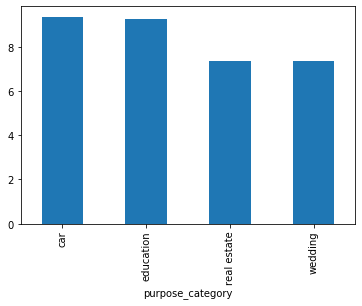

In [119]:
purpose['default_rate'].plot(kind='bar')

In [120]:
#let's take a closer look to make an observation on education more well rounded
education = df.pivot_table(index='education', values='education_id',columns='defaulted', aggfunc='count')
education['default_rate'] = education[1] / (education[0] + education[1])
education['default_rate'] = education['default_rate'] * 100
education

defaulted,0,1,default_rate
education,,,
bachelor's degree,4413.0,251.0,5.381647
graduate degree,6.0,NaN,NaN
primary education,233.0,28.0,10.727969
secondary education,12339.0,1210.0,8.930548
some college,604.0,65.0,9.715994


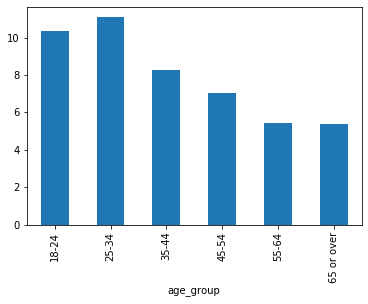

In [121]:
age = df.pivot_table(index='age_group', values='education_id',columns='defaulted', aggfunc='count')
age['default_rate'] = age[1] / (age[0] + age[1])
age['default_rate'] = age['default_rate'] * 100
age['default_rate'].plot(kind='bar')

### Conclusion

**Yes** Customers that are using the loan for cars or education are about 2% more likely to default than customers that use it for wedding or real estate. This is logical. A loan is the most likely smaller loan so if you need a loan for a car you more likely less financially stable. 

The lower the education level, the more likely that you are pursiung higher education. We can see that as education level increases, default rate decreases with customers with only primary education twice as likely to default than those with a bachelor's. We also know that younger customers which are potentially more likely to get education are more likely to defaut. This explains why customers looking for education loans default more.

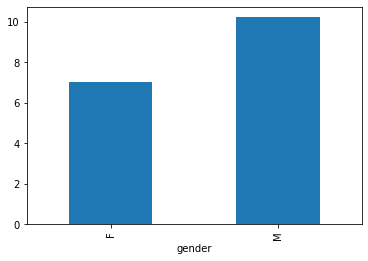

In [122]:
gender = df.pivot_table(index='gender', values='education_id',columns='defaulted', aggfunc='count')
gender['default_rate'] = gender[1] / (gender[0] + gender[1])
gender['default_rate'] = gender['default_rate'] * 100
gender['default_rate'].plot(kind='bar')

males are much more likely to default than females

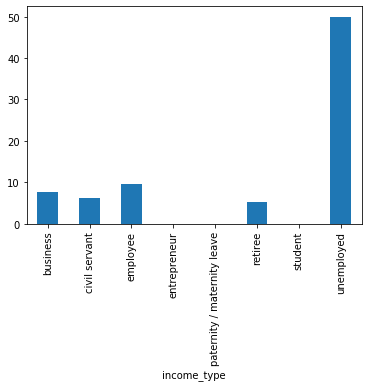

In [123]:
income_type = df.pivot_table(index='income_type', values='education_id',columns='defaulted', aggfunc='count')
income_type['default_rate'] = income_type[1] / (income_type[0] + income_type[1])
income_type['default_rate'] = income_type['default_rate'] * 100
income_type['default_rate'].plot(kind='bar')

As expected, unemployed customers are MUCH more likely to default

### Step 4. General conclusion

The goal for this project was to make recommendations and insights to consider as the bank builds a credit score to assess potential customers. 

After my analysis, the bank should consider the following customer characteristics:
* if the customer has kids
* purpose of the loan
* age group
* gender
* marital status
* income type

These are the specific attributes that were found to correlate with higher default rates:
* Having 1-2 kids
* Taking out a loan for a car or education
* Being unmarried or in a civil partnership
* Being under 35 years old
* Being a male
* Being unemployed

You should not consider income level (total_income) as you determine a customer's credit score as there was no correlation between income and default rates.

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.